In [263]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [264]:
df = pd.read_csv("vgsales.csv")

In [265]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [266]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [267]:
df = df.fillna('')

In [268]:
df.isnull().values.any()

False

In [269]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [271]:
df.dtypes


Rank              int64
Name             object
Platform         object
Year             object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [272]:
print(df)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

In [273]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [274]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [275]:
df['Year'].dtype

dtype('float64')

In [276]:
df['Year'] = df['Year'].fillna(0)


In [277]:
df['Year'] = df['Year'].astype(int)


In [278]:
df['Year'].dtype

dtype('int32')

In [279]:
df = df[df['Year'] != 0]

In [280]:
df.isnull().values.any()

False

In [281]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [282]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [283]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [284]:
df[sales_columns] = df[sales_columns] * 1000000

In [285]:
print(sales_columns)

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [286]:
descriptive_stats = df[sales_columns].describe()

In [287]:
descriptive_stats = descriptive_stats.round(0).astype(int)

In [288]:
print(descriptive_stats)

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
count     16327     16327     16327        16327         16327
mean     265415    147554     78661        48325        540232
std      821591    508766    311557       189885       1565732
min           0         0         0            0         10000
25%           0         0         0            0         60000
50%       80000     20000         0        10000        170000
75%      240000    110000     40000        40000        480000
max    41490000  29020000  10220000     10570000      82740000


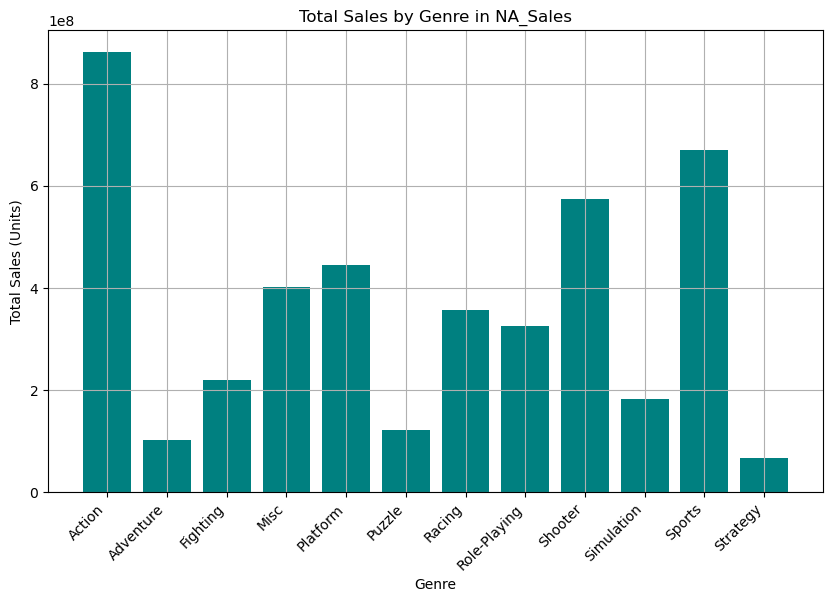

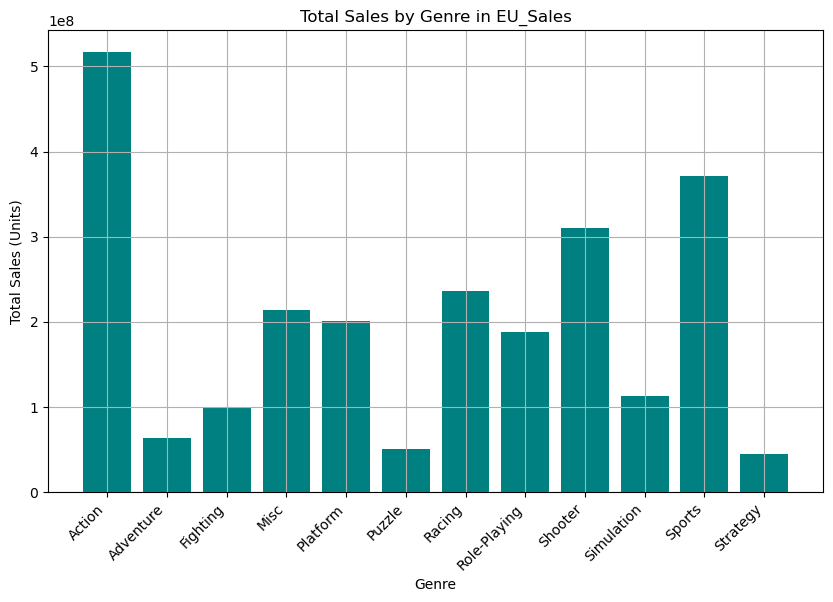

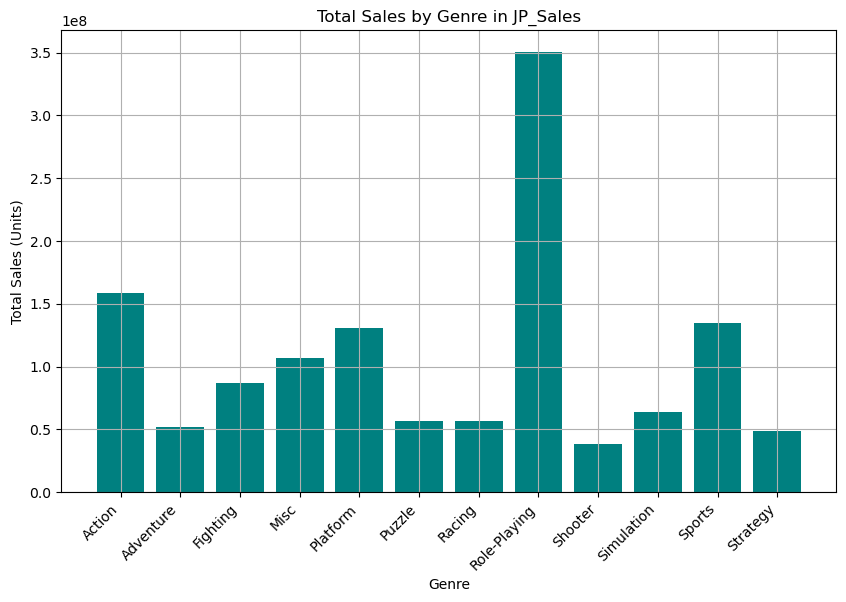

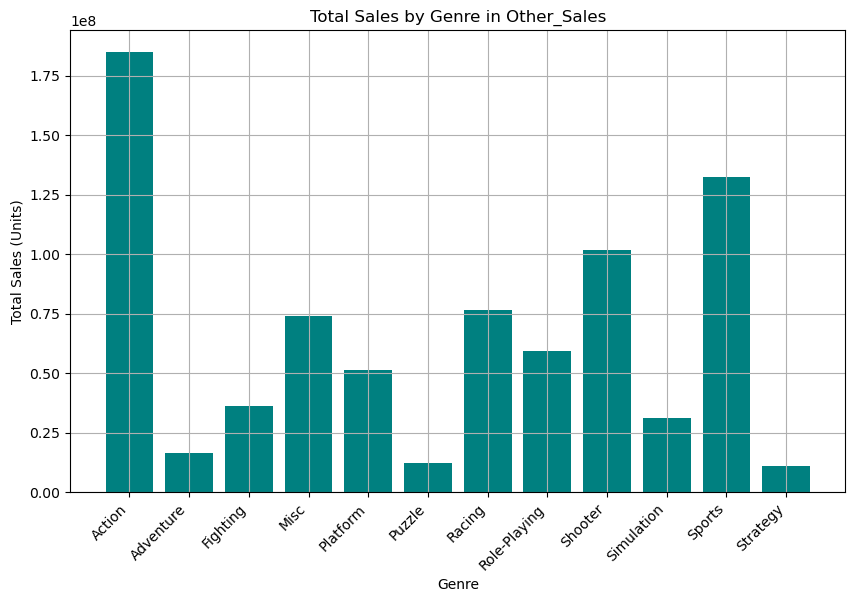

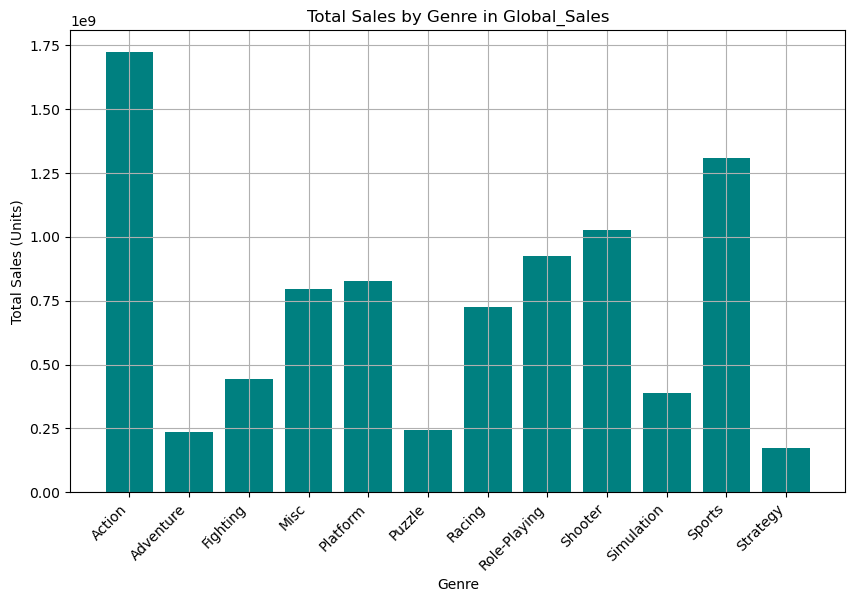

In [289]:
genre_sales = df.groupby('Genre')[sales_columns].sum()


for column in sales_columns:
    plt.figure(figsize=(10, 6))
    plt.bar(genre_sales.index, genre_sales[column], color='teal')
    plt.title(f'Total Sales by Genre in {column}')
    plt.xlabel('Genre')
    plt.ylabel('Total Sales (Units)')
    plt.xticks(rotation=45, ha="right")
    plt.grid(True)
    plt.savefig(f'Total_Sales_by_Genre_in_{column}.png')
    plt.show()

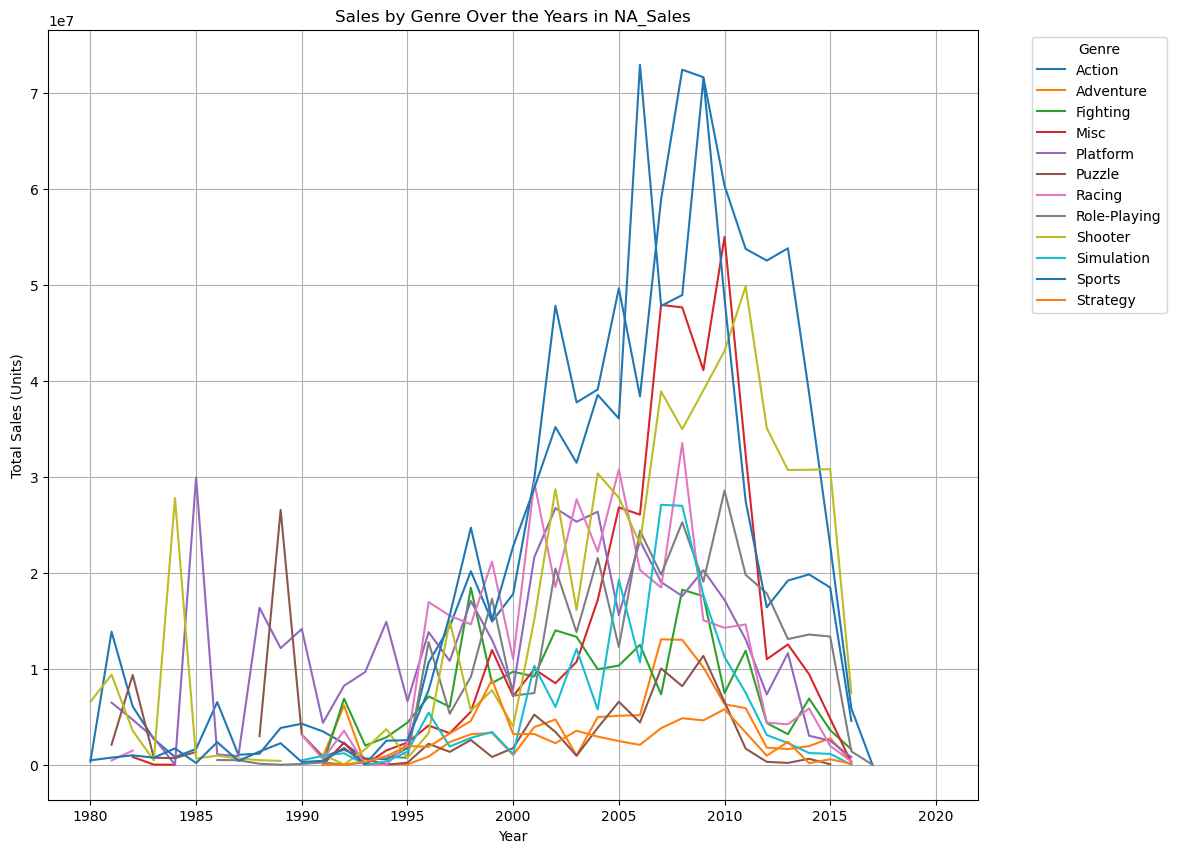

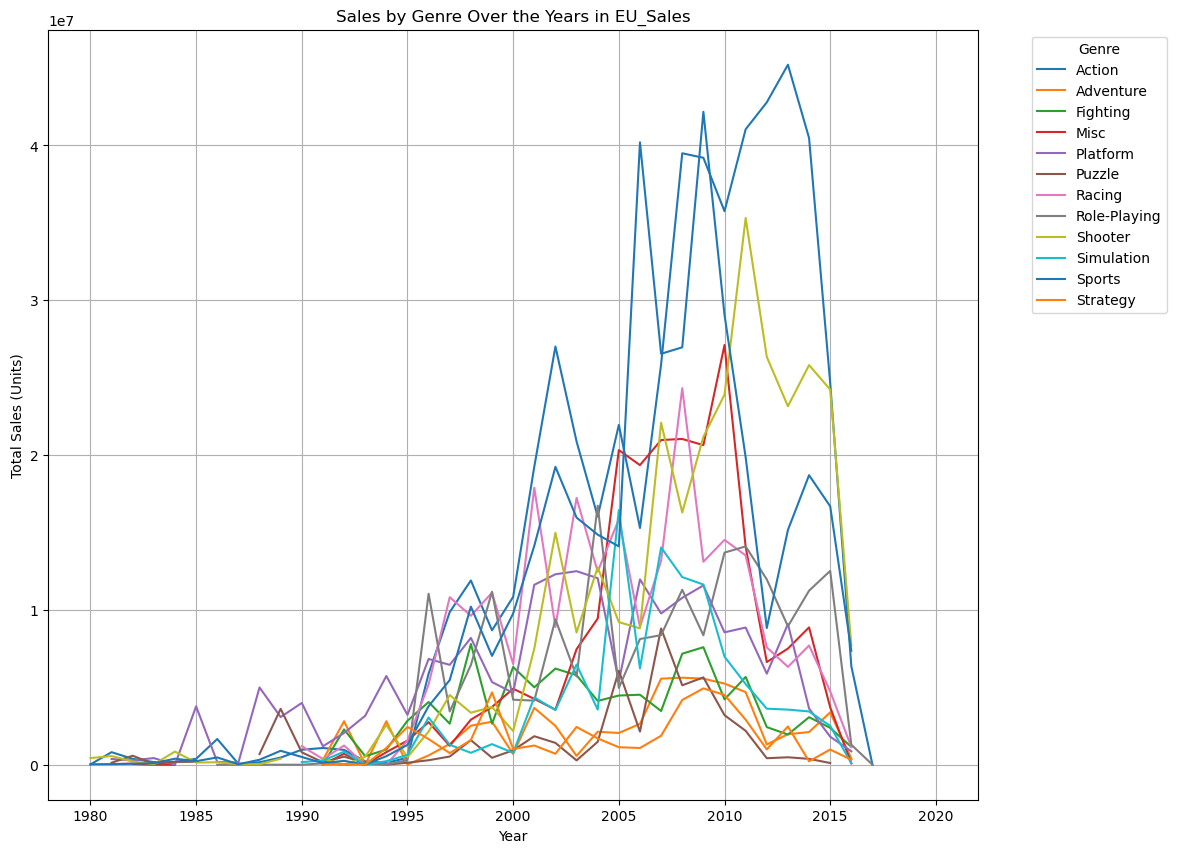

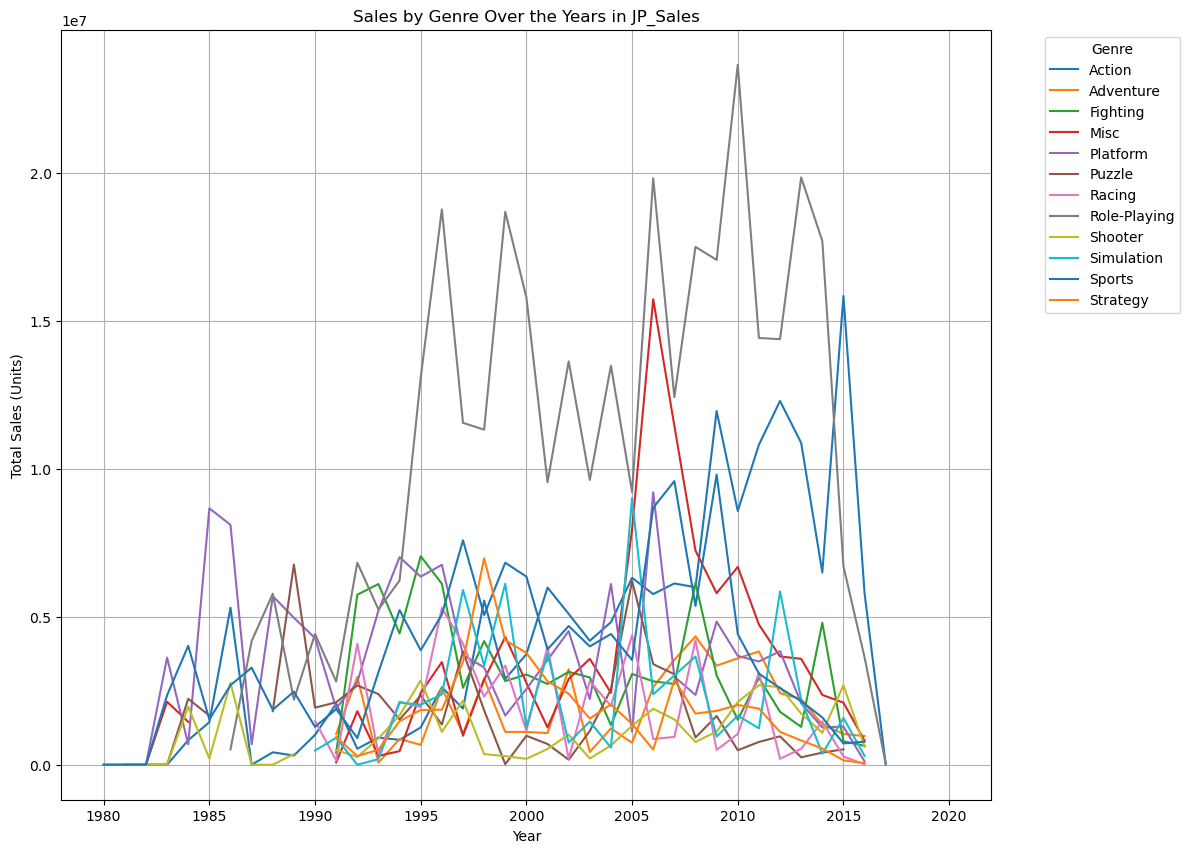

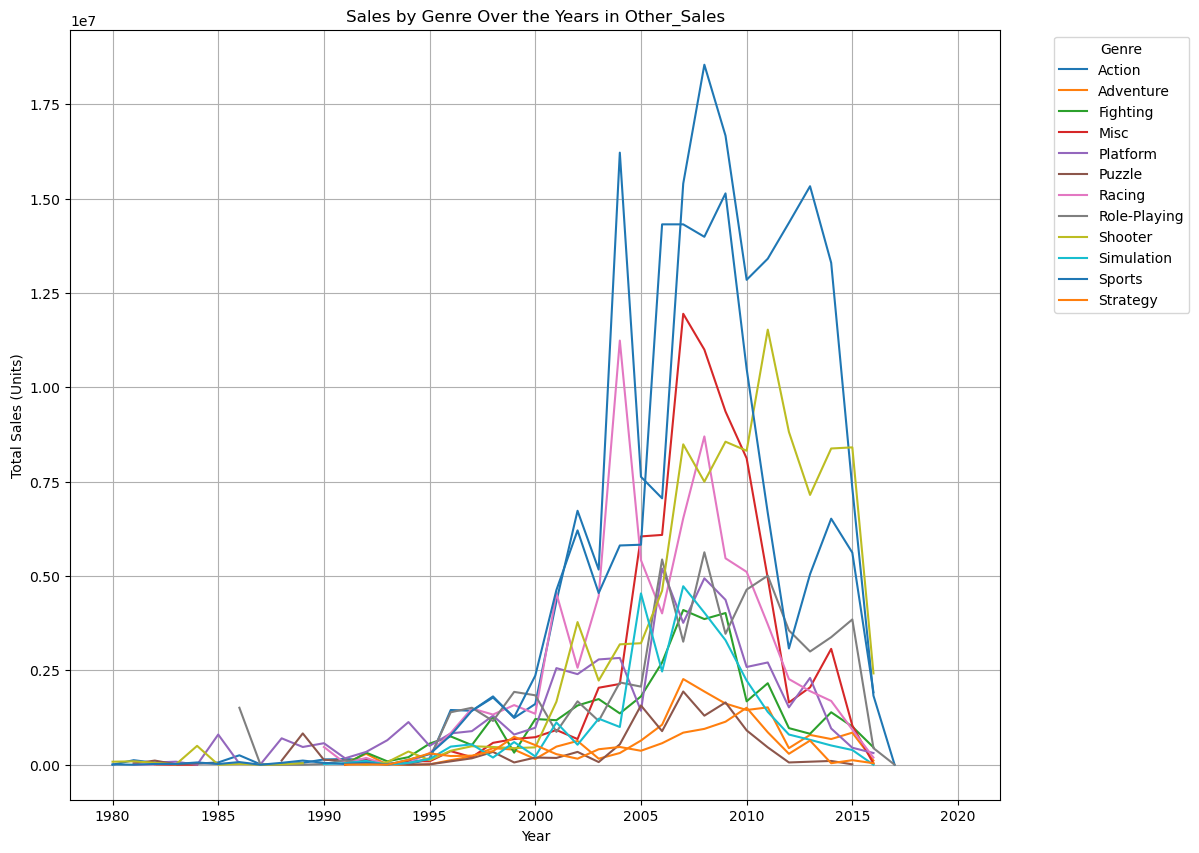

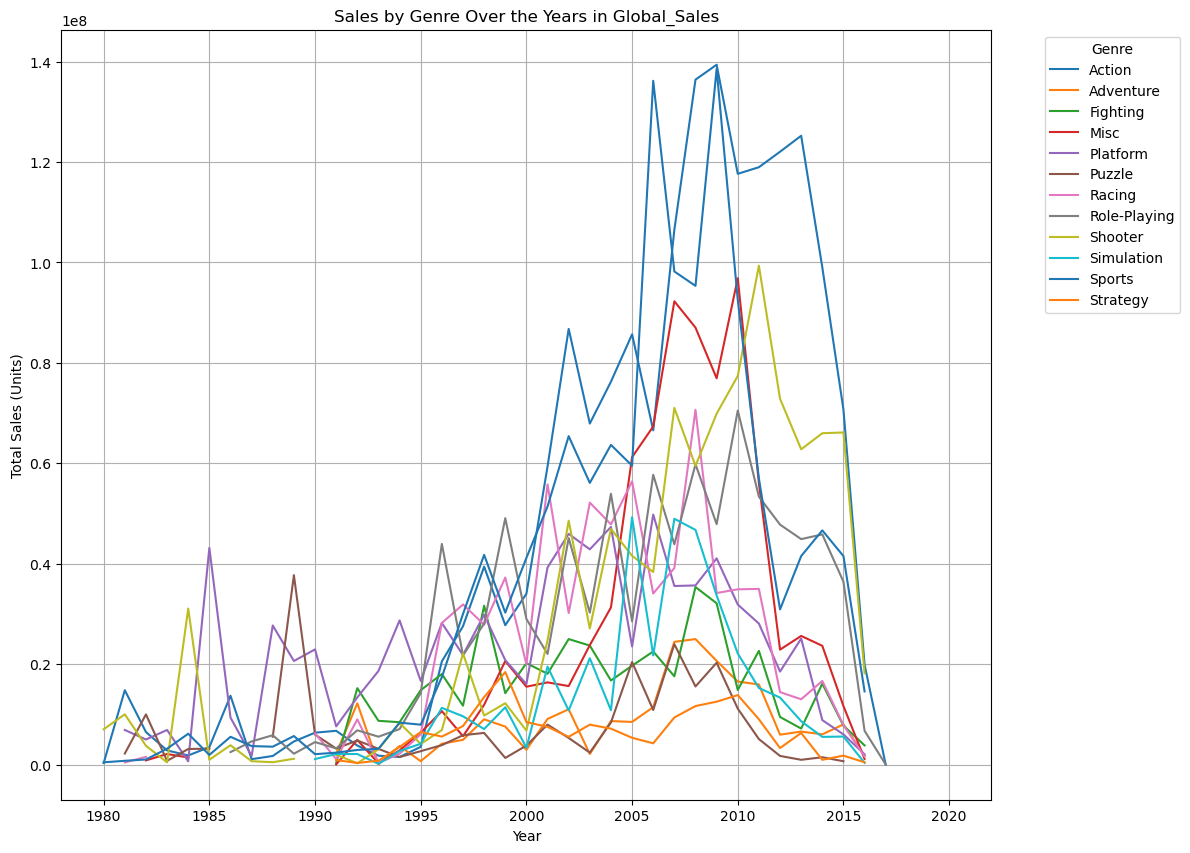

In [290]:
genre_year_sales = df.groupby(['Year', 'Genre'])[sales_columns].sum().unstack()


for column in sales_columns:
    plt.figure(figsize=(12, 10 ))
    for genre in genre_year_sales[column].columns:
        plt.plot(genre_year_sales[column].index, genre_year_sales[column][genre], label=genre)
    
    plt.title(f'Sales by Genre Over the Years in {column}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales (Units)')
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.savefig(f'Total_Sales_by_Genre_over_the_years_{column}.png')
    plt.show()

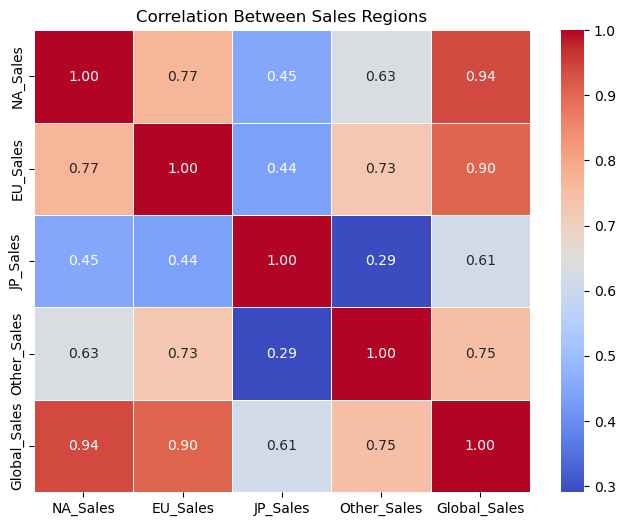

In [291]:

region_correlation = df[sales_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(region_correlation, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
plt.title('Correlation Between Sales Regions')
plt.savefig('Correlation Between Sales Regions')
plt.show()


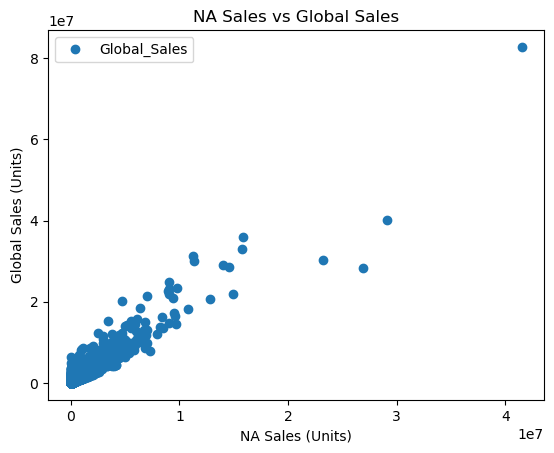

In [292]:
df.plot(x='NA_Sales', y='Global_Sales', style='o') 
plt.title('NA Sales vs Global Sales') 
plt.xlabel('NA Sales (Units)') 
plt.ylabel('Global Sales (Units)') 
plt.show()

C:\Users\daisy\AppData\Local\Temp\ipykernel_17212\788321948.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seabornInstance.distplot(df['Global_Sales'], bins=30)


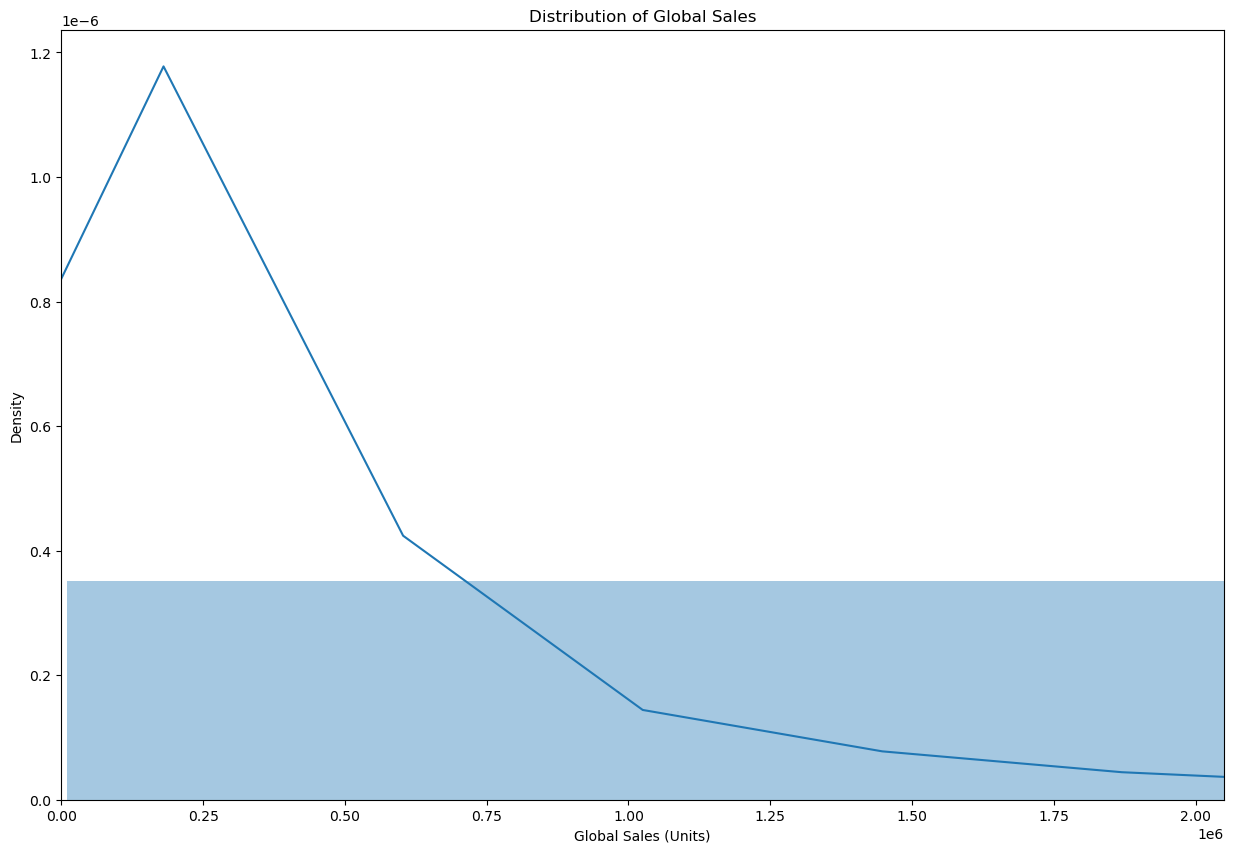

In [293]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
seabornInstance.distplot(df['Global_Sales'], bins=30) 
plt.xlim(0, df['Global_Sales'].quantile(0.95))
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Units)')
plt.ylabel('Density')
plt.show()

In [294]:
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values 
y = df['Global_Sales'].values.reshape(-1, 1)

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [296]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 


LinearRegression()

In [297]:
print(regressor.intercept_)
print(regressor.coef_)


[282.35606357]
[[0.99996134 0.99989403 0.99981461 0.99962681]]


In [309]:
y_pred = regressor.predict(X_test)

In [311]:
compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
compare


,Actual,Predicted
0,260000.0,2.602342e+05
1,400000.0,4.002582e+05
2,50000.0,5.027896e+04
3,6050000.0,6.049545e+06
4,20000.0,1.028197e+04
...,...,...
4894,170000.0,1.702574e+05
4895,300000.0,3.102543e+05
4896,1420000.0,1.420217e+06
4897,100000.0,1.002731e+05


In [313]:
plt.figure(figsize=(10, 6))
plt.scatter(na_sales_sample, y_test_sample, color='gray', alpha=0.5, label='Actual')
plt.plot(np.unique(na_sales_sample), 
         np.poly1d(np.polyfit(na_sales_sample, y_pred_sample, 1))(np.unique(na_sales_sample)),
         color='red', linewidth=1, label='Trend Line')
plt.title('Actual vs Predicted Global Sales (Trend Line)')
plt.xlabel('NA Sales (Units)')
plt.ylabel('Global Sales (Units)')
plt.legend()
plt.show()

NameError: name 'y_test_sample' is not defined

<Figure size 1000x600 with 0 Axes>

R-squared: 0.9999859722497295
Mean Squared Error: 27434525.88744913
Root Mean Squared Error: 5237.797808950736
Mean Absolute Error: 2910.0465850630158


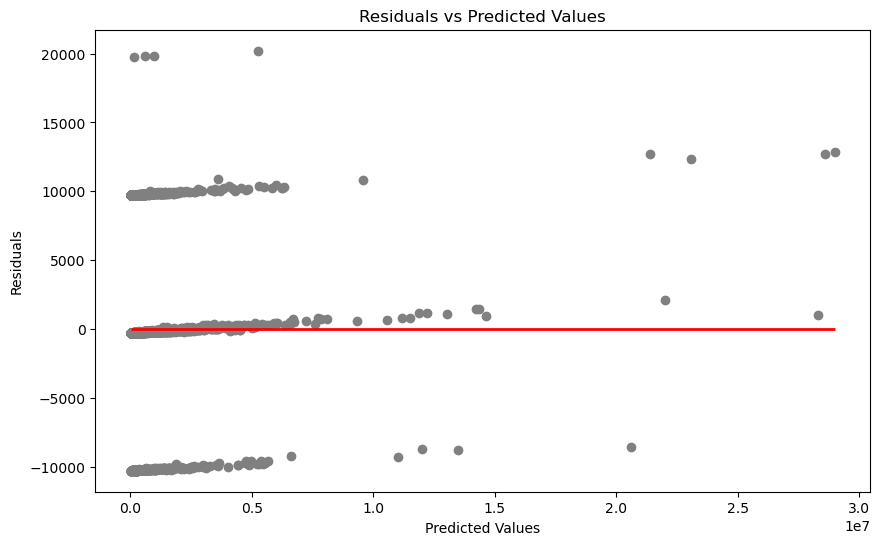

In [315]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='gray')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
test_sizes = [0.2, 0.25, 0.3]

# Store the results
results = []

# Loop over the different test sizes
for test_size in test_sizes:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    # Train the model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    # Make predictions
    y_pred = regressor.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save the results
    results.append({
        'Test Size': test_size,
        'Intercept': regressor.intercept_,
        'Coefficients': regressor.coef_,
        'MSE': mse,
        'R²': r2
    })

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)

print(results_df)